## Notebook to explore downloaded metadata from Mapillary

#### Load Libraries

In [9]:
from pathlib import Path
from environs import Env
import geopandas as gpd
import contextily

import glob
import json
import pandas as pd
from pandas import json_normalize
import numpy as np


In [10]:
from streetscapes.sources import Mapillary
from streetscapes.streetview import SVWorkspace

#### Initiate environment and city to analyse

In [11]:
env = Env()
env.read_env(".env")
city = "Amsterdam"

In [12]:
hf_path = Path(env.path("HF_HOME"), city)
ws = SVWorkspace(hf_path)
mp = Mapillary(ws.env, root_dir=hf_path)
mp

Mapillary(root_dir='/gpfs/work4/0/prjs0914/streetscapes/Amsterdam')

#### Convert json files to geopandas dataframes

In [30]:
def convert_to_gdf(dataframe):
    if "computed_geometry.coordinates" in dataframe.columns and not isinstance(dataframe["computed_geometry.coordinates"][0], float):
        dataframe['lon'] = [x[0] for x in dataframe['geometry.coordinates']]
        dataframe['lat'] = [x[1] for x in dataframe['geometry.coordinates']]
        gdf = gpd.GeoDataFrame(dataframe, geometry=gpd.points_from_xy(dataframe.lon, dataframe.lat))
        gdf.set_crs("EPSG:4326", allow_override=True, inplace=True)
        return gdf

def json_to_gdf(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    norm_df = json_normalize(data)
    gdf = convert_to_gdf(norm_df)
    return gdf

In [31]:
# Images by bounding box that we have downloaded metadata for

bbox_ids = glob.glob("./image_ids/bbox*.json")
bbox_dfs = []
for f in bbox_ids:
    bbox_gdf = json_to_gdf(f)
    bbox_dfs.append(bbox_gdf)

# Images by creator username that we have downloaded metadata for

creator_ids = glob.glob("./image_ids/test*.json")
creator_dfs = []
for f in creator_ids:
    creator_gdf = json_to_gdf(f)
    creator_dfs.append(creator_gdf)


#### Plot location of images

In [51]:
def create_plot(dfs):
    ax = dfs[0].plot(color="red", markersize=0.4, figsize=(10, 10), alpha=0.5)

    ax.set_xlim(4.7,5.1)
    ax.set_ylim(52.25,52.5)

    contextily.add_basemap(ax, crs=gdf.crs, source=contextily.providers.nlmaps.standaard)

    for i in dfs:
        if i is not None:
            i.plot(ax=ax, color="red", markersize=0.4, alpha=0.5)
    return ax

##### Images by bounding box

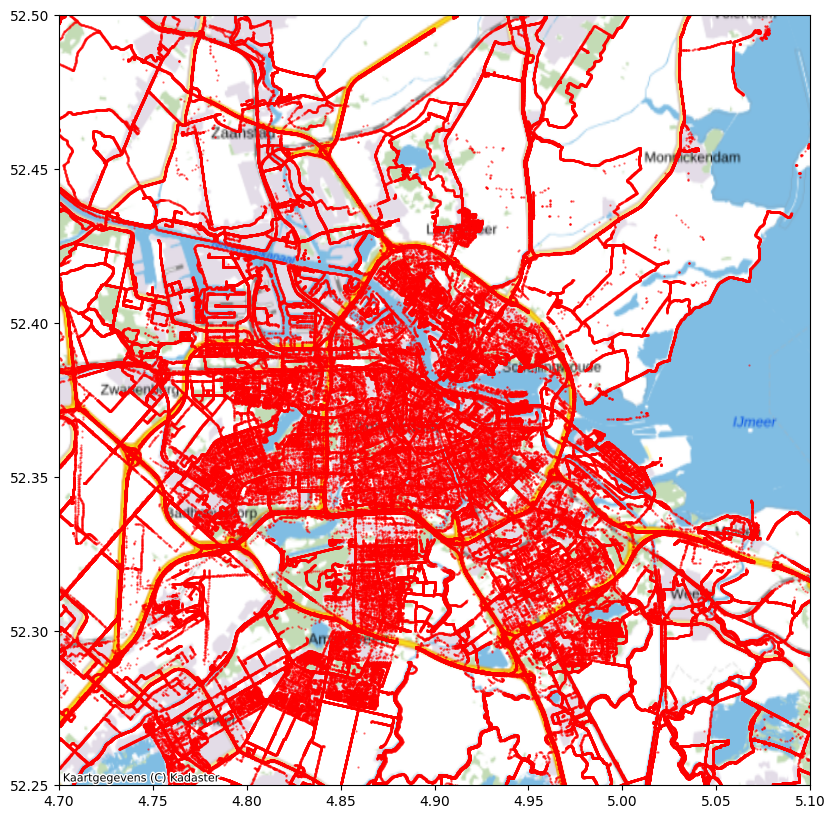

In [52]:
ax = create_plot(bbox_dfs)


##### Images by creator username

In this case 'amsterdam'

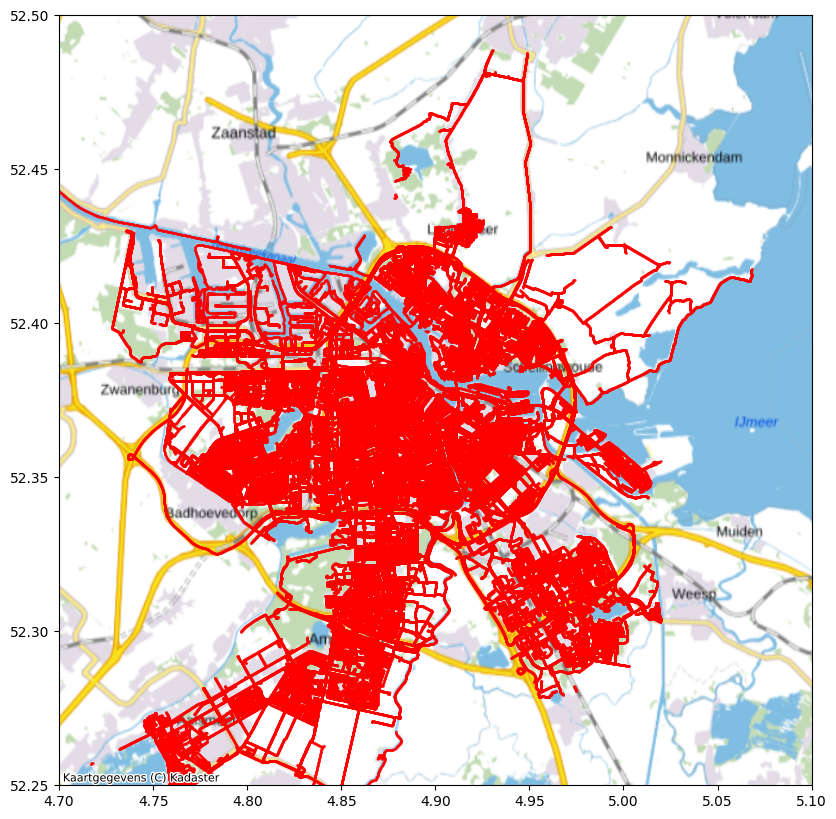

In [53]:
ax = create_plot(creator_dfs)